# LET'S GROW MORE.....

Prediction Using Decision tree

Author- Sneha Dattatray Salunke

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
iris=df=pd.read_csv("C:\IRIS.csv")

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [14]:
iris['species_class']=np.where(iris.species=='Iris-virginica',1,np.where(iris.species=='Iris-versicolor',2,3))

In [16]:
iris.species_class.value_counts()

3    50
2    50
1    50
Name: species_class, dtype: int64

In [17]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_class'],
      dtype='object')

In [18]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [19]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( iris[cols],
                                                  iris['species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

In [20]:
#Model Building
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [21]:
tree.best_score_

0.95

In [22]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=2)

In [23]:
tree.best_params_

{'max_depth': 3, 'max_features': 2}

In [24]:
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)

In [25]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
#Building Final Decision Tree
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [27]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [28]:
tree_test_pred.sample( n = 10 )

,actual,predicted
63,2,2
28,3,3
87,2,2
121,1,1
31,3,3
45,3,3
59,2,2
37,3,3
42,3,3
133,1,2


In [29]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9333333333333333

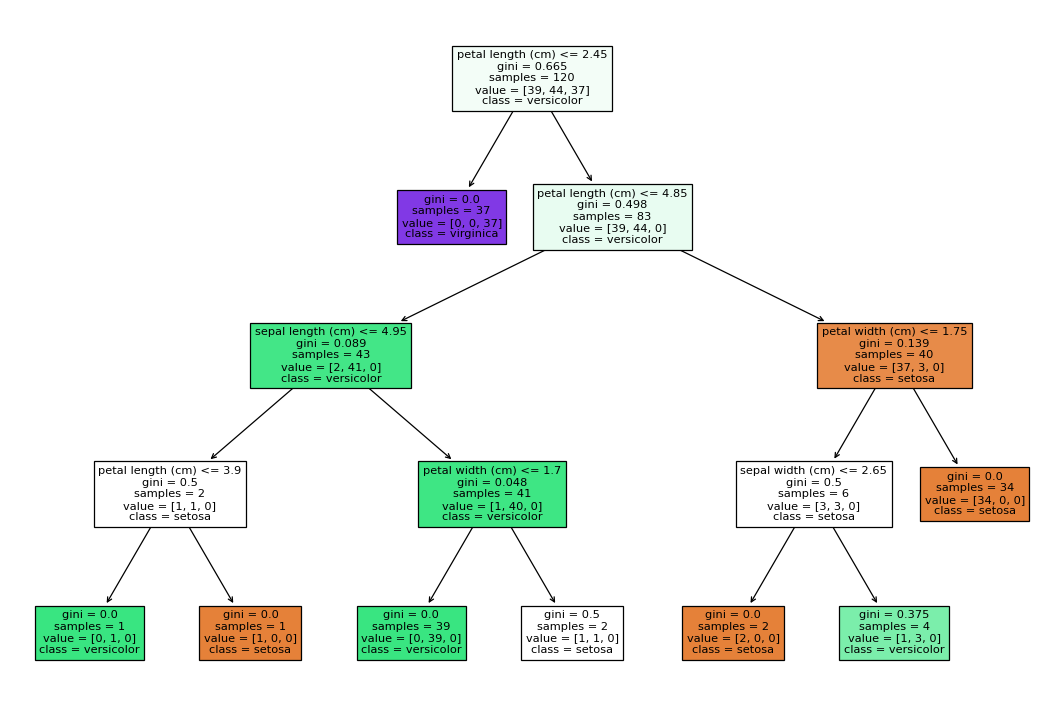

In [30]:
#Graphical Representation of Decision Tree
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=90)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')